In [1]:
from turtle import color
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


# own code base
import sys
sys.path.append("..")
import tf_loss_functions as lf
import splines as sp

2024-02-28 17:30:32.659764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Setting the hyperparameters

basis_dimension = 20       
degree_bsplines = 3
penalty_diff_order = 2

k = 1
j = 0
method = "gcv"


# Hyperparameters Plot
# Font sizes
font_size = 20
font_size_legend = 16
font_size_ticks = 16

font_size_small = 18

In [3]:
x1 = pd.read_csv(f"./data/df_x1.csv", index_col=0).iloc[:,0]
y = pd.read_csv(f"./data/df_y.csv", index_col=0).iloc[:,0]

x1_ps = sp.pspline(x = x1, 
                    degree_bsplines = degree_bsplines, 
                    penalty_diff_order = penalty_diff_order, 
                    knot_type="equi", 
                    basis_dimension = basis_dimension)

labels = np.expand_dims(y, 1)

In [4]:
plotdata_tf = np.load("./spline_method=gcv_epochs=10000.npz")

lambda_param_est = plotdata_tf["reg_param"]
weights_est = plotdata_tf["weights"]
print(f"Estimated lambda: {lambda_param_est}")

Estimated lambda: 0.46690934896469116


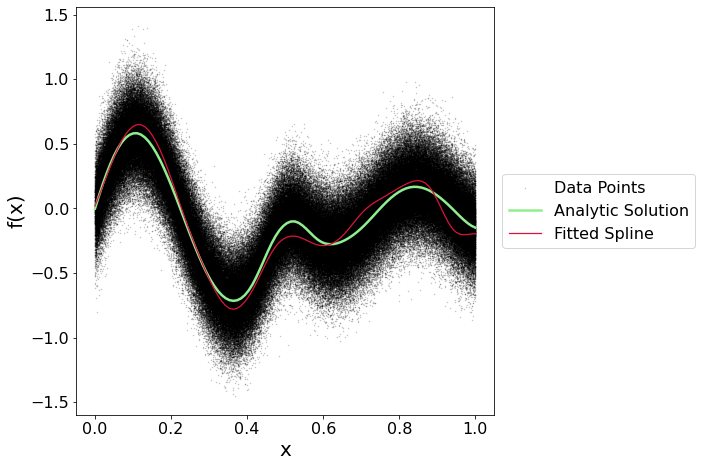

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 7.5))
beta_hat = np.dot(np.matmul(np.linalg.inv(np.matmul(np.transpose(x1_ps.design_matrix), x1_ps.design_matrix) + lambda_param_est*x1_ps.penalty_matrix), np.transpose(x1_ps.design_matrix)), y)

ax.scatter(x1, y, marker='o', s=0.2, alpha=.25, c="black", label="Data Points")
x_plot = np.linspace(x1.min(),x1.max(),num=100)
matrix_plot = sp.build_base(x_plot, degree = degree_bsplines, knot_type = "given", given_knots = x1_ps.knots)[0]
y_hat_analytic = np.dot(matrix_plot, beta_hat)
ax.plot(x_plot, y_hat_analytic, lw=2.5, label="Analytic Solution", color="lightgreen")


x_plot = np.linspace(x1.min(),x1.max(), num=100)
matrix_plot = sp.build_base(x_plot, degree = degree_bsplines, knot_type = "given", given_knots = x1_ps.knots)[0]
y_hat = np.dot(matrix_plot, weights_est)

ax.plot(x_plot, y_hat, ls='-', lw=1.25, label=f"Fitted Spline", color="crimson")

ax.set_xlabel("x", fontsize=font_size)
ax.set_ylabel('f(x)', fontsize=font_size)
ax.tick_params(labelsize=font_size_ticks)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=font_size_legend)

fig.set_facecolor('white')
plt.savefig(f"./spline_gcv_BIG_epoch_10000.png", bbox_inches='tight', dpi=300)
plt.savefig(f"./spline_gcv_BIG_epoch_10000.pdf", bbox_inches='tight', dpi=300)
plt.show()